## Limits of Diversification

-including the anatomy of a cap-weighted portfolio, and a bunch of cool pandas stuff along the way

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.optimize import minimize 
import edhec_risk_kit as erk 



In [3]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value weighted monthly returns
    """
    
    ind = pd.read_csv("ind30_m_vw_rets.csv", header = 0, index_col = 0)/100
    ind.index = pd.to_datetime(ind.index, format= "%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():
    """

    """
    
    ind = pd.read_csv("ind30_m_size.csv", header = 0, index_col = 0)/100
    ind.index = pd.to_datetime(ind.index, format= "%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind





def get_ind_nfirms():
    """

    """
    
    ind = pd.read_csv("ind30_m_nfirms.csv", header = 0, index_col = 0)
    ind.index = pd.to_datetime(ind.index, format= "%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind


In [4]:
ind_return = erk.get_ind_returns()
ind_nfirm = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [5]:
ind_return.shape

(1110, 30)

In [6]:
ind_nfirm.shape

(1110, 30)

In [7]:
ind_size.shape

(1110, 30)

In [8]:
ind_nfirm.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [9]:
ind_mktcap = ind_nfirm * ind_size
ind_mktcap.shape

(1110, 30)

In [10]:
# Computing total market cap
# Summing across columns
total_mktcap = ind_mktcap.sum(axis="columns")

<AxesSubplot:>

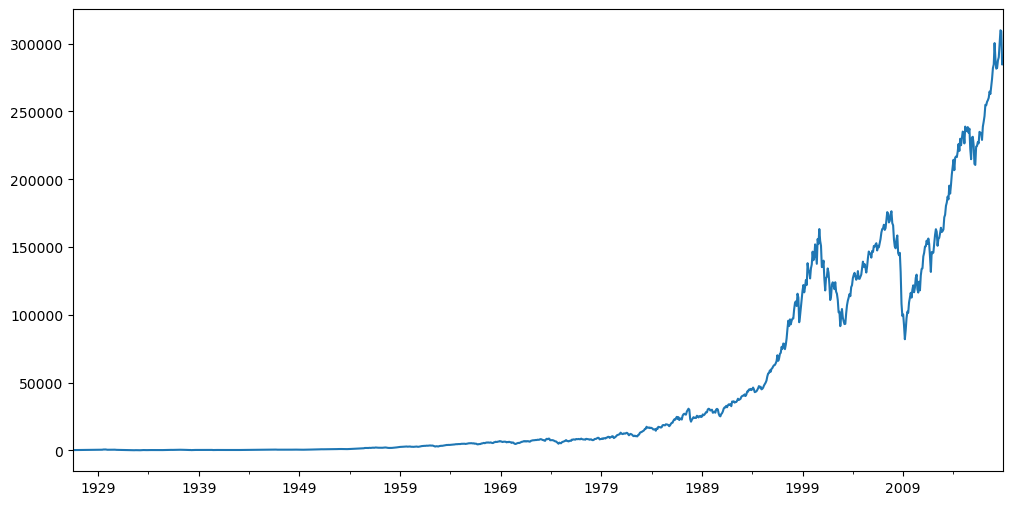

In [11]:
total_mktcap.plot(figsize=(12,6))

In [12]:
# Dividing mktcap by total_mktcap FOR EVERY ROW

ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [13]:
# If you add up each row, food+beer+smoke+... , you should get 1.0, representing total market cap.

ind_capweight.loc["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

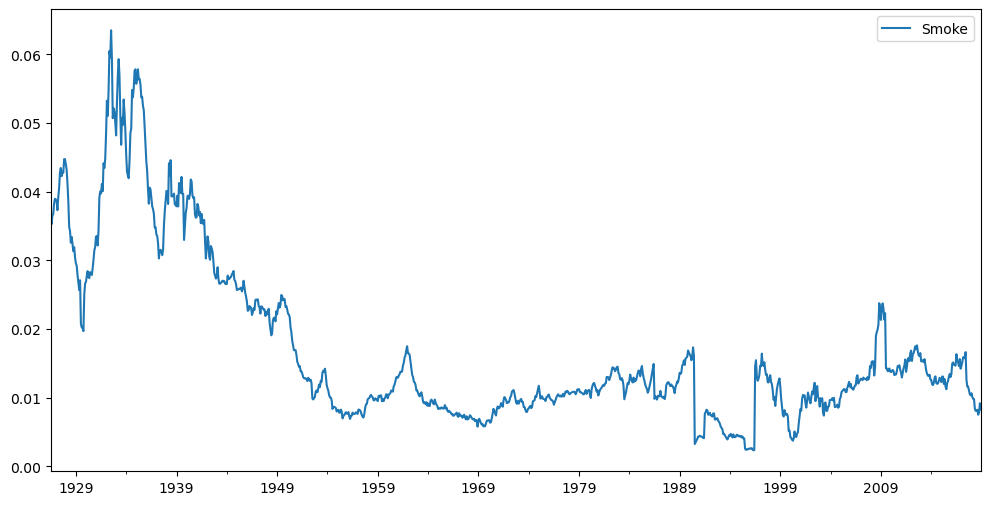

In [14]:
# To plot the mkt cap of fin/steel industries

ind_capweight[["Smoke"]].plot(figsize=(12,6))

In [72]:
total_market_return = (ind_capweight*ind_return).sum(axis="columns")

<AxesSubplot:>

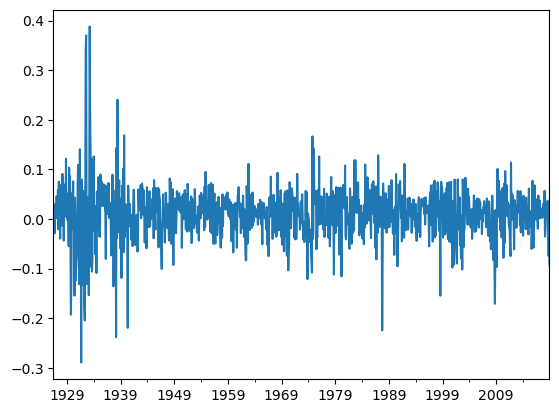

In [73]:
total_market_return.plot()

<AxesSubplot:title={'center':'Total Market Capweighted Index 1926-2018'}>

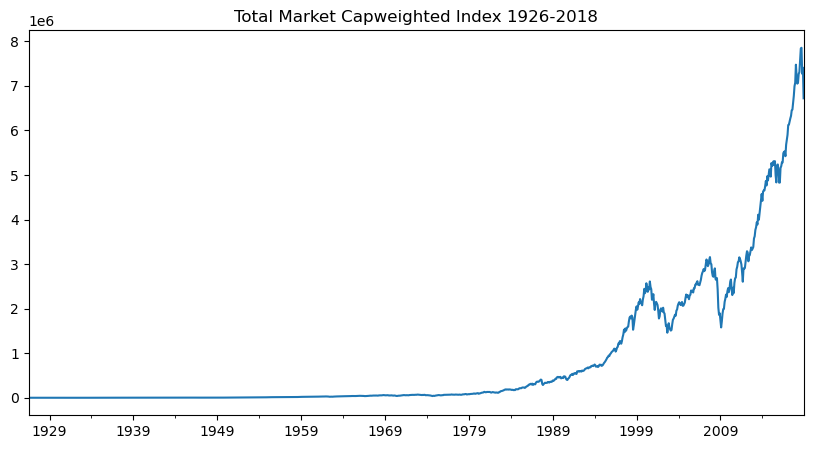

In [74]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title = "Total Market Capweighted Index 1926-2018")

<AxesSubplot:>

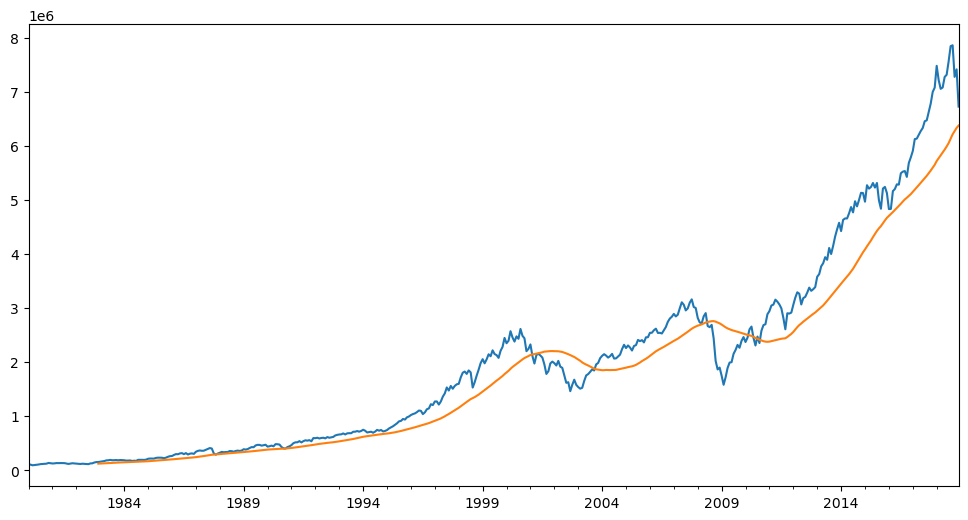

In [75]:
# TO plot a moving average

total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot() # Index must be a time series to do a rolling plot

<AxesSubplot:>

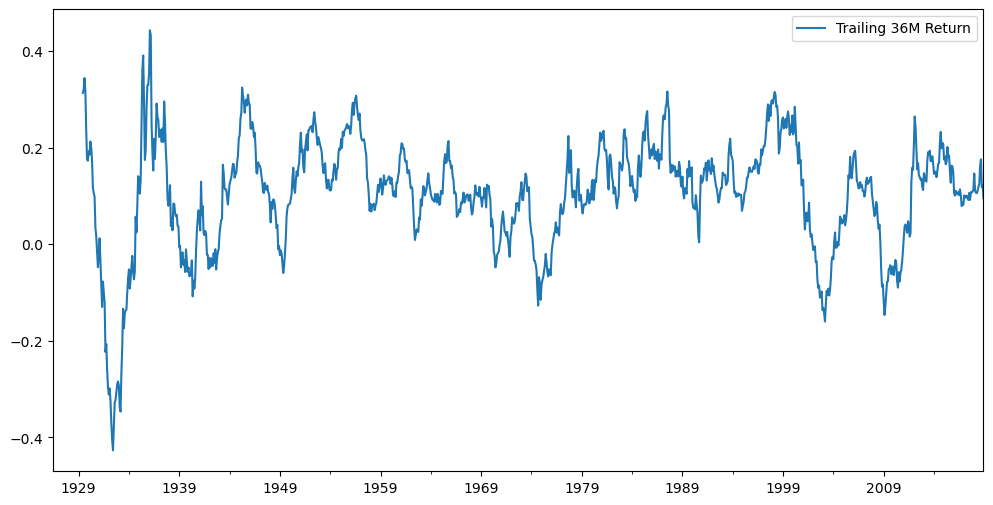

In [76]:
# TO look at the returns of the total market index

# To get the trailing 36 month returns compounded
tmi_trail36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_trail36rets.plot(figsize=(12,6), label="Trailing 36M Return", legend=True)
# total_market_return.plot(label="Returns", legend=True)

In [77]:
# To measure the average correlation among the industries 


## Rolling Correlations - along with MultiIndexes and `.groupby

In [78]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [79]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [80]:
ts_corr.index.names

FrozenList([None, None])

In [81]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<AxesSubplot:xlabel='date'>

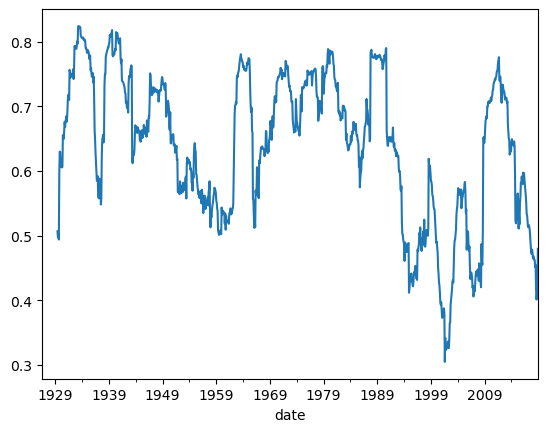

In [82]:
ind_trail36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_trail36corr.plot()

<AxesSubplot:xlabel='date'>

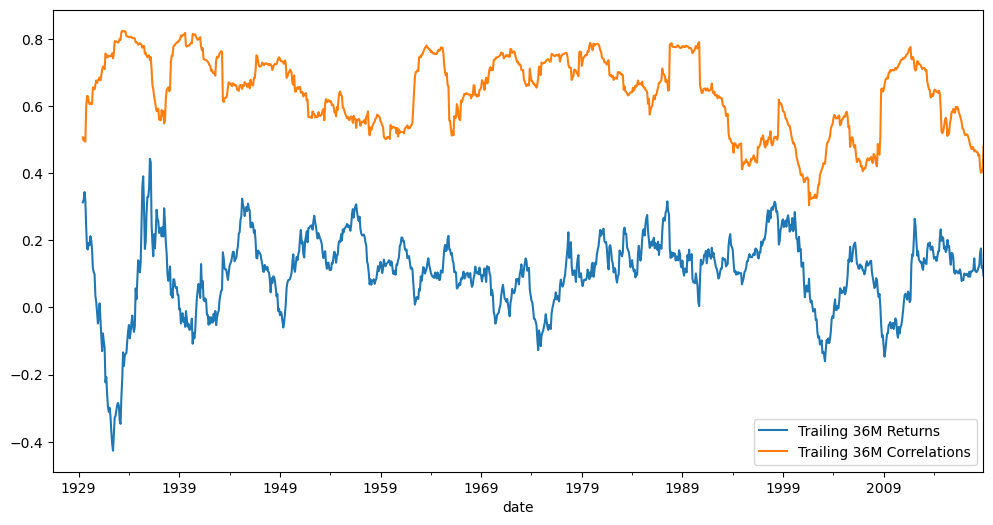

In [83]:
tmi_trail36rets.plot(label="Trailing 36M Returns", figsize=(12,6), legend=True)
ind_trail36corr.plot(label="Trailing 36M Correlations", figsize=(12,6), legend=True)

<AxesSubplot:>

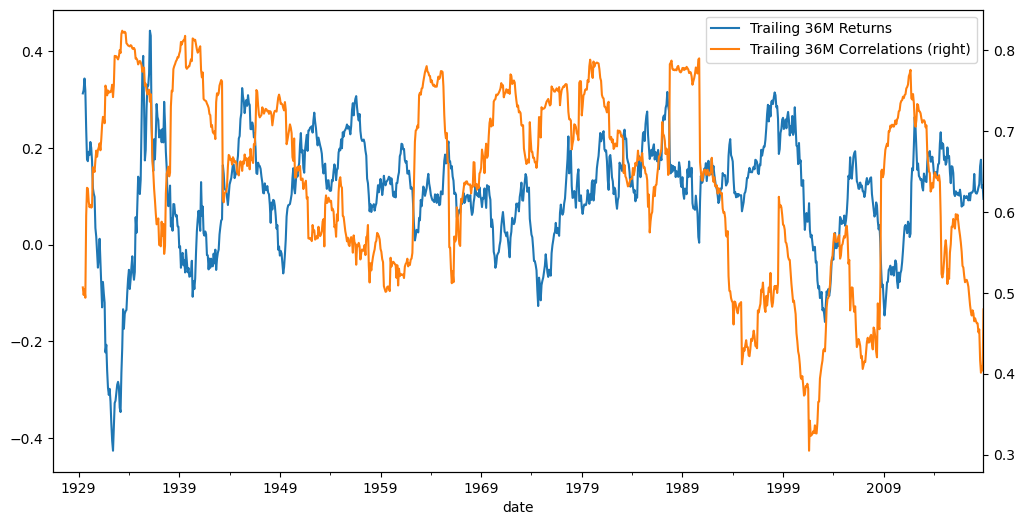

In [84]:
# To add a y-axis for more clear understanding
# Left axis is for returns, Right axis for correlations


tmi_trail36rets.plot(label="Trailing 36M Returns", figsize=(12,6), legend=True)
ind_trail36corr.plot(label="Trailing 36M Correlations", figsize=(12,6), legend=True, secondary_y=True)

<AxesSubplot:>

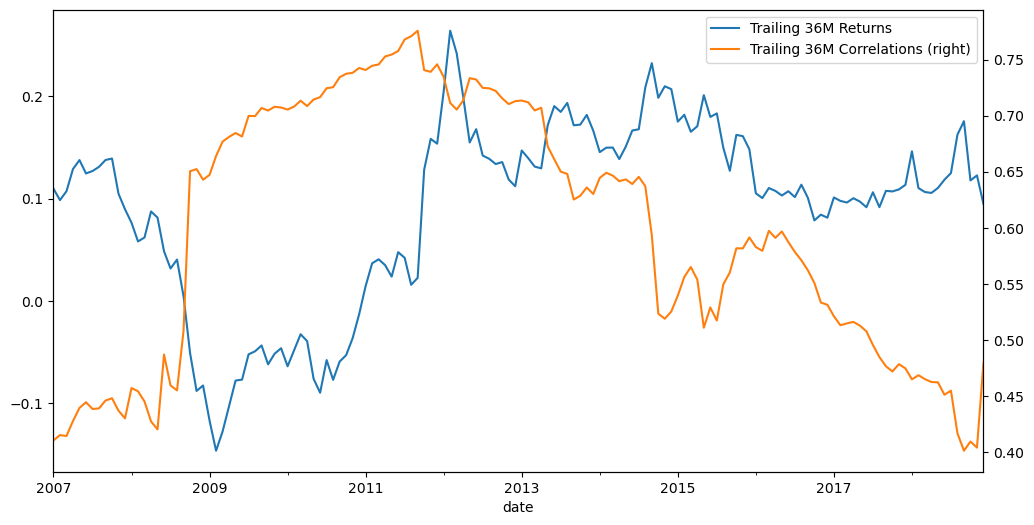

In [85]:
tmi_trail36rets["2007":].plot(label="Trailing 36M Returns", figsize=(12,6), legend=True)
ind_trail36corr["2007":].plot(label="Trailing 36M Correlations", figsize=(12,6), legend=True, secondary_y=True)

In [86]:
tmi_trail36rets.corr(ind_trail36corr)



# Correlation between the avg corr of industries and returns

-0.28010065062884

In [87]:
# Diversification does not help you when markets are crashing